import library

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras.layers
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split


import data

In [163]:
data= pd.read_csv('gender_classification_v7.csv')

the first rows of data 

In [164]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


is there is null in data

In [165]:
data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [167]:
# there is dublicate in data 
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


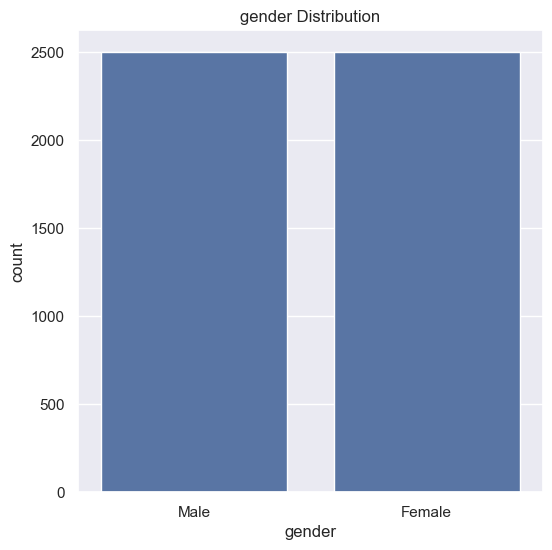

In [168]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=data)
plt.title('gender Distribution')
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_11835/1438891642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['forehead_width_cm'])


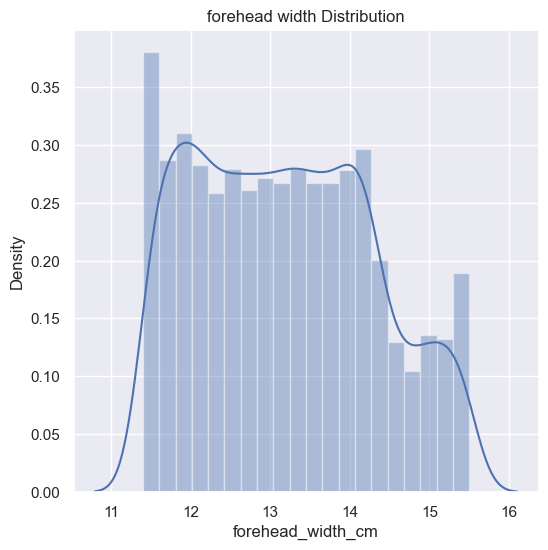

In [169]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['forehead_width_cm'])
plt.title('forehead width Distribution')
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_11835/1084947095.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['forehead_height_cm'])


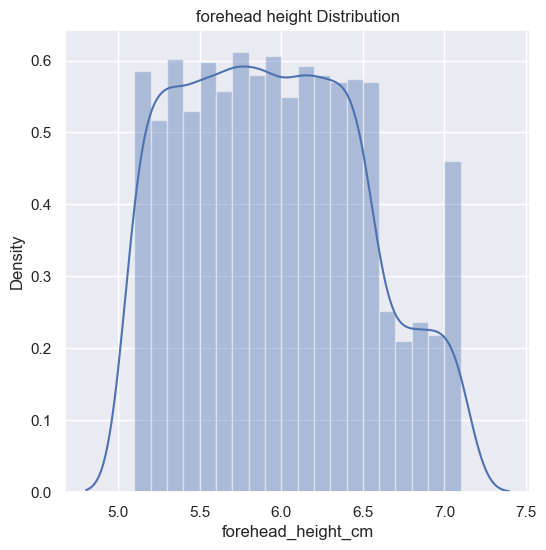

In [170]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['forehead_height_cm'])
plt.title('forehead height Distribution')
plt.show()

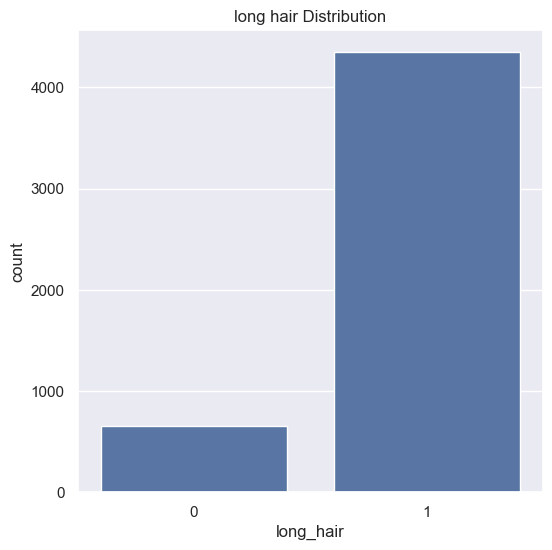

In [171]:
plt.figure(figsize=(6,6))
sns.countplot(x='long_hair', data=data)
plt.title('long hair Distribution')
plt.show()

Data Visualization

In [172]:
data["gender"].value_counts()


gender
Female    2501
Male      2500
Name: count, dtype: int64

In [173]:
f=data[data.gender=='Female']
m=data[data.gender=='Male']
data.gender=[1 if j=='Male' else 0 for j in data.gender]
data["gender"].value_counts()


gender
0    2501
1    2500
Name: count, dtype: int64

In [174]:
# separating the predictors and the target column
X = data.drop(['gender'],axis=1)
y=data['gender']
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [175]:
# splitting the dataset using train_test_split 
# train:test = 80:20
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape
y_test.shape


(1001,)

Modeling

In [176]:
KerasModel= keras.models.Sequential([
keras.layers.Dense(8 , activation='tanh'),
#keras.layers.Dropout(0,1),
keras.layers.Dense(128, activation='tanh'),
keras.layers.Dense(64,activation='tanh'),
#keras.layers.Dropout(0,1),

keras.layers.Dense(1,activation='sigmoid') 
])

In [177]:
KerasModel.compile( loss='BinaryCrossentropy',metrics=['accuracy'])

In [178]:
history=KerasModel.fit(x_train,y_train,      #traning
                validation_data=(x_test,y_test),
                epochs=100,
                batch_size=100,
                verbose=1,
                callbacks=[tf.keras.callbacks.EarlyStopping(
                    patience=20,
                    monitor='val_accuracy',#val_loss reg,
                    restore_best_weights=True
                )])

Epoch 1/100
40/40 [==============================] - 1s 11ms/step - loss: 0.5718 - accuracy: 0.7095 - val_loss: 0.3558 - val_accuracy: 0.8621
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 0.3063 - accuracy: 0.8598 - val_loss: 0.2668 - val_accuracy: 0.8791
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 0.2579 - accuracy: 0.8813 - val_loss: 0.2283 - val_accuracy: 0.9001
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 0.2256 - accuracy: 0.9003 - val_loss: 0.2134 - val_accuracy: 0.9111
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 0.1900 - accuracy: 0.9253 - val_loss: 0.1807 - val_accuracy: 0.9371
Epoch 6/100
40/40 [==============================] - 0s 8ms/step - loss: 0.1628 - accuracy: 0.9463 - val_loss: 0.1625 - val_accuracy: 0.9411
Epoch 7/100
40/40 [==============================] - 0s 8ms/step - loss: 0.1453 - accuracy: 0.9505 - val_loss: 0.1506 - val_accuracy: 0.9471
Epoch 8/100


In [179]:
print(KerasModel.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 64        
                                                                 
 dense_25 (Dense)            (None, 128)               1152      
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________
None


In [180]:
#SAVING THE MODEL
KerasModel.save('KerasModel.model')

INFO:tensorflow:Assets written to: KerasModel.model/assets


In [181]:
KerasModel1=keras.models.load_model('KerasModel.model')

In [182]:
y_pred=KerasModel1.predict(x_test)

32/32 [==============================] - 0s 2ms/step


Model Accuracy

In [183]:
Model_loss,Model_accuracy=KerasModel.evaluate(x_test,y_test)
print( 'model loss{} '.format(Model_loss))
print( 'model accuracy {}'.format(Model_accuracy))

32/32 [==============================] - 0s 5ms/step - loss: 0.0943 - accuracy: 0.9650
model loss0.09429292380809784 
model accuracy 0.9650349617004395


<function matplotlib.pyplot.show(close=None, block=None)>

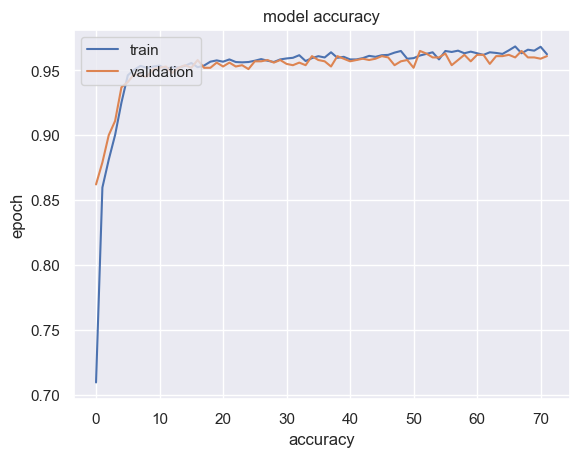

In [184]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'validation'],loc='upper left')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

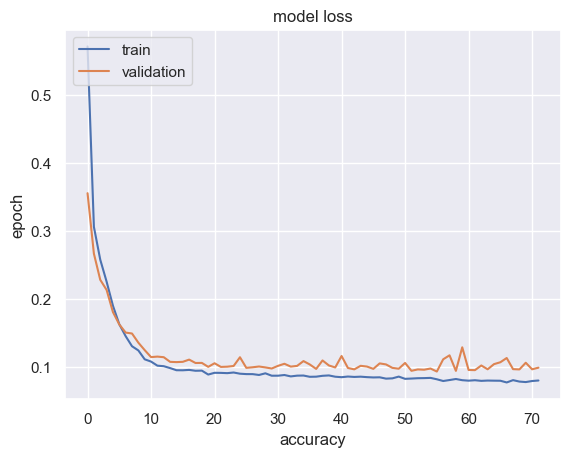

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'validation'],loc='upper left')
plt.show

In [186]:
# Predicting the Test set results
y_pred=[np.round(i[0])for i in y_pred]
y_pred

[1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [187]:
classification_report= classification_report(y_test,y_pred)
print('classification_report :\n',classification_report)

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       502
           1       0.95      0.98      0.97       499

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

